In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.integrate import dblquad
import utils

In [3]:
figsize = (12, 6)

In [4]:
def _const_curve(t):
    return np.full(len(t), .234**2) if isinstance(t, np.ndarray) else .234**2

In [5]:
xi_1 = utils.VarianceCurve(_const_curve)
xi_2 = utils.VarianceCurve(lambda t: .234**2 * (1. + t)**2)
xi_3 = utils.VarianceCurve(lambda t: .234**2 * np.sqrt(1. + t))

$$
\xi_t(u) = \mathbb{E}[V_u|\mathcal{F}_t], \qquad u > t
$$

# Domands for Jimssss

1. Wtf is the time unit?
2. Why is $C_H$ buggy?

In [6]:
print(f"xi_1 = {xi_1(utils.DELTA):.6f}")
print(f"xi_2 = {xi_2(utils.DELTA):.6f}")
print(f"xi_3 = {xi_3(utils.DELTA):.6f}")

xi_1 = 0.054756
xi_2 = 0.068569
xi_3 = 0.057924


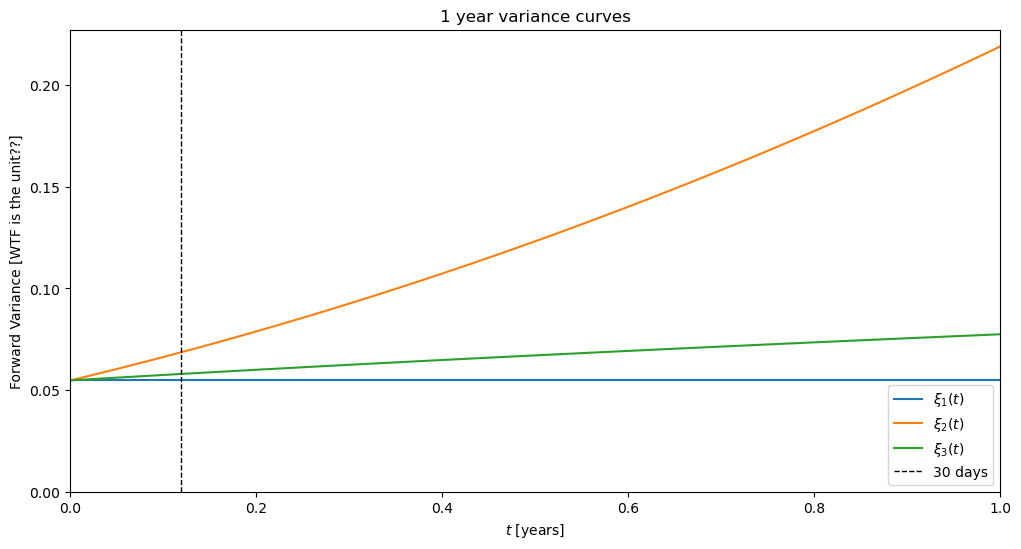

In [7]:
fig, ax = plt.subplots(1, 1, figsize=figsize)
xaxis = np.linspace(0, 1., 100)

ax.plot(xaxis, xi_1(xaxis), label=r"$\xi_1(t)$")
ax.plot(xaxis, xi_2(xaxis), label=r"$\xi_2(t)$")
ax.plot(xaxis, xi_3(xaxis), label=r"$\xi_3(t)$")

ax.axvline(utils.DELTA, ls='--', lw=1, color='black', label='30 days')

ax.set_title("1 year variance curves")
ax.set_xlabel(r"$t$ [years]"); ax.set_ylabel("Forward Variance [WTF is the unit??]")
ax.set_ylim(bottom=0); ax.set_xlim(0, 1)
ax.legend()

plt.show()

# Picing

In [28]:
H = utils.Hurst(0.07)
print(f'sqrt 2H = {np.sqrt(H.h2):.6f}')
print(f'CH = {utils.c_h(H):.6f}')
volvol = 1.2287  # 1.9 * utils.c_h(H) * np.sqrt(H.h2) / 2
print(volvol)

sqrt 2H = 0.374166
CH = 0.289302
1.2287


In [29]:
exp_vix = utils.expected_vix_sq(xi_2, T=0)
exp_vix_sq = utils.moment2_vix_sq(xi_2, utils.DELTA, volvol, H, T=0)

In [30]:
np.sqrt(exp_vix / utils.DELTA)

0.24805895448050086

In [31]:
np.sqrt(np.exp(utils.mu_lognormal(exp_vix, exp_vix_sq)) / utils.DELTA)

0.2480589544805009

In [32]:
def price(curve, T):
    exp_vix = utils.expected_vix_sq(curve, T=T)
    exp_vix_sq = utils.moment2_vix_sq(curve, utils.DELTA, volvol, H, T=T)
    return np.sqrt(np.exp(utils.mu_lognormal(exp_vix, exp_vix_sq)) / utils.DELTA)

In [33]:
import warnings
warnings.filterwarnings('ignore')

100%|███████████████████████████████████████████| 10/10 [00:05<00:00,  1.75it/s]


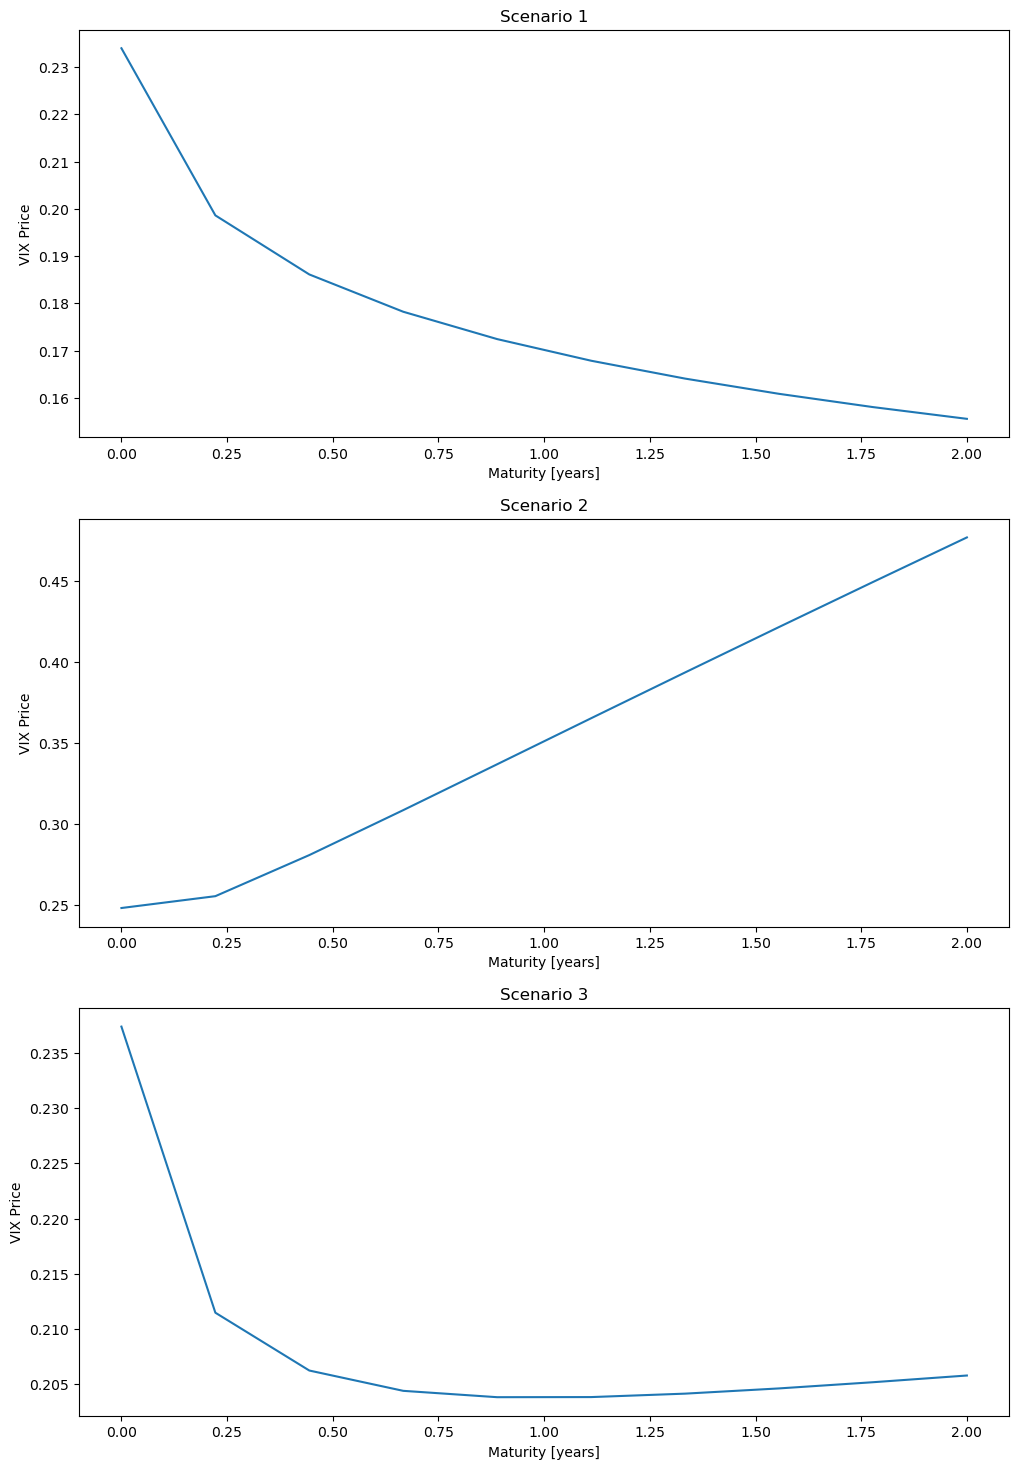

In [34]:
fig, axs = plt.subplots(3, 1, figsize=(12, 18))
maturity = np.linspace(0, 2., 10)

for i, curve in enumerate((xi_1, xi_2, xi_3)):
    ax = axs[i]
    prices = []
    for tau in tqdm(maturity):
        vix = price(curve, T=tau)
        prices.append(vix)
    ax.plot(maturity, prices, label=f'xi_{i+1}(t)')
    ax.set_title(f"Scenario {i+1}")
    ax.set_xlabel("Maturity [years]"); ax.set_ylabel("VIX Price")

plt.show()

In [15]:
for tau in maturity:
    print(f"Tau: {tau:.2f}\tExp: {utils.expected_vix_sq(xi_2, T=tau):.6f}\tExp_sq: {utils.moment2_vix_sq(xi_2, utils.DELTA, volvol, H, T=tau):.6f}")

Tau: 0.00	Exp: 0.007325	Exp_sq: 0.000054
Tau: 0.22	Exp: 0.010717	Exp_sq: 0.000219
Tau: 0.44	Exp: 0.014752	Exp_sq: 0.000538
Tau: 0.67	Exp: 0.019431	Exp_sq: 0.001112
Tau: 0.89	Exp: 0.024754	Exp_sq: 0.002061
Tau: 1.11	Exp: 0.030721	Exp_sq: 0.003538
Tau: 1.33	Exp: 0.037332	Exp_sq: 0.005728
Tau: 1.56	Exp: 0.044586	Exp_sq: 0.008850
Tau: 1.78	Exp: 0.052484	Exp_sq: 0.013165
Tau: 2.00	Exp: 0.061026	Exp_sq: 0.018973


In [16]:
for tau in maturity:
    print(f"Tau: {tau:.2f}\tExp: {utils.expected_vix_sq(xi_2, T=tau):.6f}\tExp_sq: {utils.moment2_vix_sq(xi_2, utils.DELTA, volvol, H, T=tau):.6f}")

Tau: 0.00	Exp: 0.007325	Exp_sq: 0.000054
Tau: 0.22	Exp: 0.010717	Exp_sq: 0.000219
Tau: 0.44	Exp: 0.014752	Exp_sq: 0.000538
Tau: 0.67	Exp: 0.019431	Exp_sq: 0.001112
Tau: 0.89	Exp: 0.024754	Exp_sq: 0.002061
Tau: 1.11	Exp: 0.030721	Exp_sq: 0.003538
Tau: 1.33	Exp: 0.037332	Exp_sq: 0.005728
Tau: 1.56	Exp: 0.044586	Exp_sq: 0.008850
Tau: 1.78	Exp: 0.052484	Exp_sq: 0.013165
Tau: 2.00	Exp: 0.061026	Exp_sq: 0.018973
